# MOC in the depth space - the Eulerian-mean streamfunction

This notebook is converted from plt_vh_z.py, which calculates the Eulerian-mean streamfunction using the meridional velocity and layer thickness in the depth space.

Last updated 29 September 2017.

In [1]:
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt

In [2]:
# read v
data  = nc.Dataset('/short/v45/lxy581/mom6/archive/so_mom6_v33/output028/prog.nc','r')
# read layer thicknesses
coord = nc.Dataset('/short/v45/lxy581/mom6/archive/so_mom6_v33/output028/Vertical_coordinate.nc','r')
# horizontal resolution in km
dx = 10.

In [4]:
xh = data.variables['xh'][:]
yh = data.variables['yh'][:]   
yq = data.variables['yq'][:]
zl = data.variables['zl'][:]
t  = data.variables['Time'][:]

In [5]:
nz = np.size(zl)
nx = np.size(xh)
ny = np.size(yq)
nt = np.size(t)

In [6]:
# layer thicknesses in m
ds = coord.variables['ds'][:]
# create a numpy array repetitive of ds
ds2 = np.full((nz,ny),np.nan)
for j in xrange(0,ny):
    ds2[:,j]=ds[:]

dx2 = np.full((nz,ny),dx)

In [7]:
# zonal-mean temperature field
temp3 = np.zeros((1,nz,ny))
tempx = np.full((1,nz,ny),np.nan)

for k in xrange(0,nt):
    #print k
    temp  = data.variables['temp'][k,:,:,:]
    tempx[0,:,:] = np.nanmean(temp,axis=-1) # zonal-mean
    temp3 = np.append(temp3,tempx,0)

temp3 = temp3[1:,:,:]
temp2 = np.nanmean(temp3,axis=0)

In [8]:
vh = np.zeros((1,nz,ny))
vht= np.full((1,nz,ny),np.nan)

for k in xrange(0,nt):
    #print k
    v  = data.variables['v'][k,:,:,:]   # 3D meridional velocity
    v  = v.filled(np.nan)
    vz = np.nansum(v,axis=2)            # zonal-sum velocity vz(z,y)
    mt = vz*ds2*dx2/1.e+3               # meridional transport mt(z,y) in Sv

    vht[0,:,:] = mt
    vh = np.append(vh,vht,0)

vh = vh[1:,:,:]
vhm = np.nanmean(vh,axis=0)
vhmc= np.cumsum(vhm,axis=0)             # vertical cumulative integral from the surface

/apps/python/2.7.6/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:514: FutureWarning: In Numpy 1.9 the sum along empty slices will be zero.
  FutureWarning)
/apps/python/2.7.6/lib/python2.7/site-packages/numpy/lib/nanfunctions.py:607: RuntimeWarning: Mean of empty slice
  warnings.warn("Mean of empty slice", RuntimeWarning)


In [9]:
%matplotlib inline

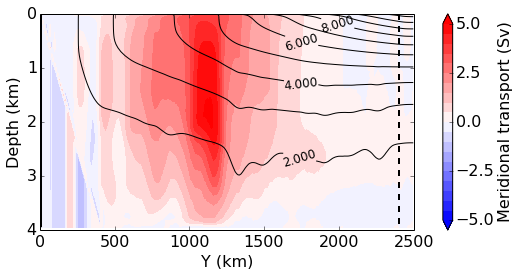

In [10]:
plt.figure(1,figsize=(8,5))

t_level = np.arange(0,12+1,1)
t_label = np.arange(2,8+2,2)
vh_level = np.arange(-5,5 + 0.5,0.5)
vh_ticks = np.arange(-5,5 + 2.5,2.5)

pcf = plt.contourf(yq,zl,vhmc,cmap=plt.cm.bwr,levels=vh_level,extend='both')
pc  = plt.contour(yh,zl,temp2,colors='k',levels=t_level,extend='both')
manual_locations = [(750,100),(500,500),(500,1200),(500,2600)]
plt.clabel(pc,t_label,inline=1,fontsize=12,manual=manual_locations)
plt.plot([1150,1150],[0,4000],linewidth=2.0,linestyle='--',color='k')
cb = plt.colorbar(pcf,ticks=vh_ticks)
plt.gca().invert_yaxis()
plt.gca().set_xticks(np.arange(-1250,1250 + 500,500))
plt.gca().set_xticklabels(['0','500','1000','1500','2000','2500'])
plt.gca().set_yticks(np.arange(0,4000 + 1000,1000))
plt.gca().set_yticklabels(['0','1','2','3','4'])
plt.gca().set_position([0.15,0.2,0.65,0.6])
cb.ax.set_position([0.85,0.2,0.03,0.6])
cb.set_label('Meridional transport (Sv)',y=0.5,fontsize=16)
cb.ax.tick_params(labelsize=16)
plt.xlabel('Y (km)',fontsize=16)
plt.ylabel('Depth (km)',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

#plt.savefig('/short/v45/lxy581/mom6/diag/v33_vh_z_y50.png',dpi=600)

plt.show()